## Analysis of Games Genre Metrics Dataset
In this analysis, we explore the financial and player engagement metrics of various gaming genres to uncover key insights into industry trends. The dataset includes metrics such as Total Revenue, Total Estimated Players, Average Playtime, and Average Positive Review Rate for each genre.

In [1]:
# Imports and Preprocessing
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the relative path to the data folder
file_path = os.path.join(os.getcwd(), "../data", "games_genre_metrics.csv")

# Read the CSV file
games_genre_metrics = pd.read_csv(file_path)
print(games_genre_metrics.head())

      Genres  Average_Playtime_Forever  Average_Positive_Review_Rate  \
0     action                 89.770182                        0.5693   
1  adventure                 84.134090                        0.5624   
2        rpg                150.509576                        0.5387   
3      indie                 59.240322                        0.5677   
4   strategy                138.939020                        0.5560   

   Total_Estimated_Players  Total_Revenue  Number_of_Games  
0             4.749815e+09   6.389563e+10            38004  
1             2.765970e+09   4.137617e+10            35864  
2             1.877345e+09   3.524506e+10            16657  
3             3.273505e+09   3.241613e+10            64501  
4             1.449030e+09   1.928588e+10            17760  


 ### Average Playtime by Genre

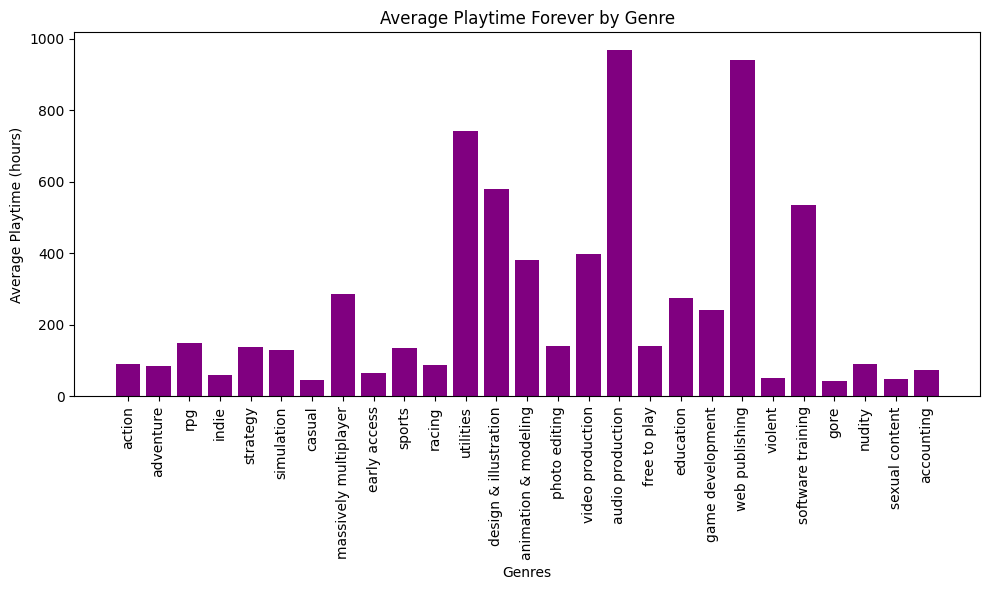

In [2]:
 # Bar Chart 1: Average Playtime Forever by Genre
plt.figure(figsize=(10,6))
plt.bar(games_genre_metrics['Genres'], games_genre_metrics['Average_Playtime_Forever'], color='purple')
plt.title('Average Playtime Forever by Genre')
plt.xlabel('Genres')
plt.ylabel('Average Playtime (hours)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This chart identifies which genres tend to have the highest player engagement by comparing the average playtime across genres. The dataset includes categories like “Audio Production” and “Web Publishing”, along with other non-gaming genres like “Video Production”, “Photo Editing”, and “Design & Illustration”. These categories most likely represent software or tools available on platforms like Steam, which offer more than just games. “Audio Production” and “Web Publishing” show significantly higher average playtime compared to game genres like “RPG” and “Strategy”, suggesting that users spend a substantial amount of time using these software tools.

### Total Revenue by Genre: Top 16 genres

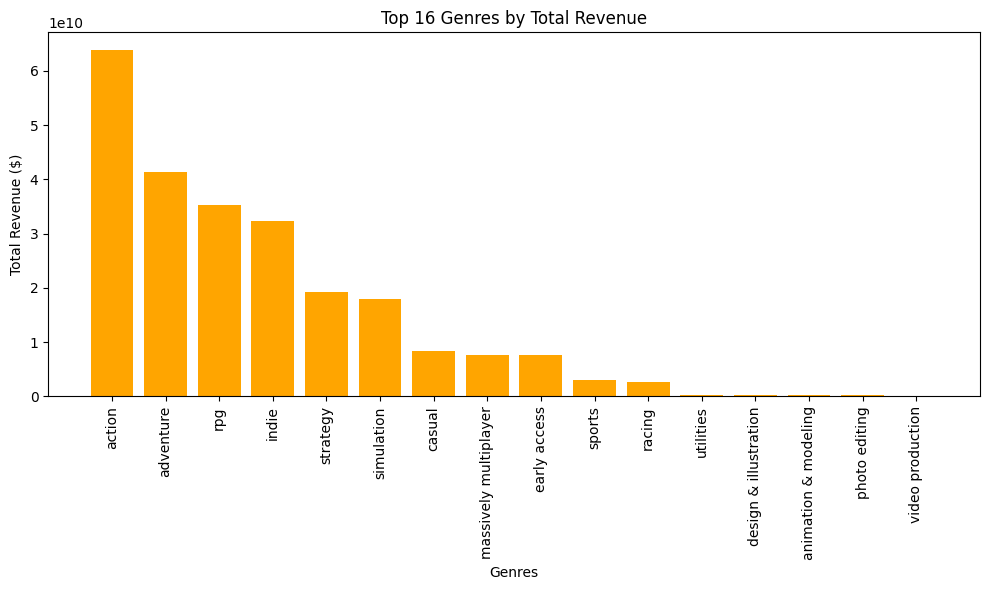

In [3]:
# Bar Chart 2: Total Revenue by Genre: Top 16 genres
# Sort the data by total revenue and select the top 16 genres
top_16_genres = games_genre_metrics.sort_values(by='Total_Revenue', ascending=False).head(16)

plt.figure(figsize=(10,6))
plt.bar(top_16_genres['Genres'], top_16_genres['Total_Revenue'], color='orange')
plt.title('Top 16 Genres by Total Revenue')
plt.xlabel('Genres')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Revenue Per Game by Genre

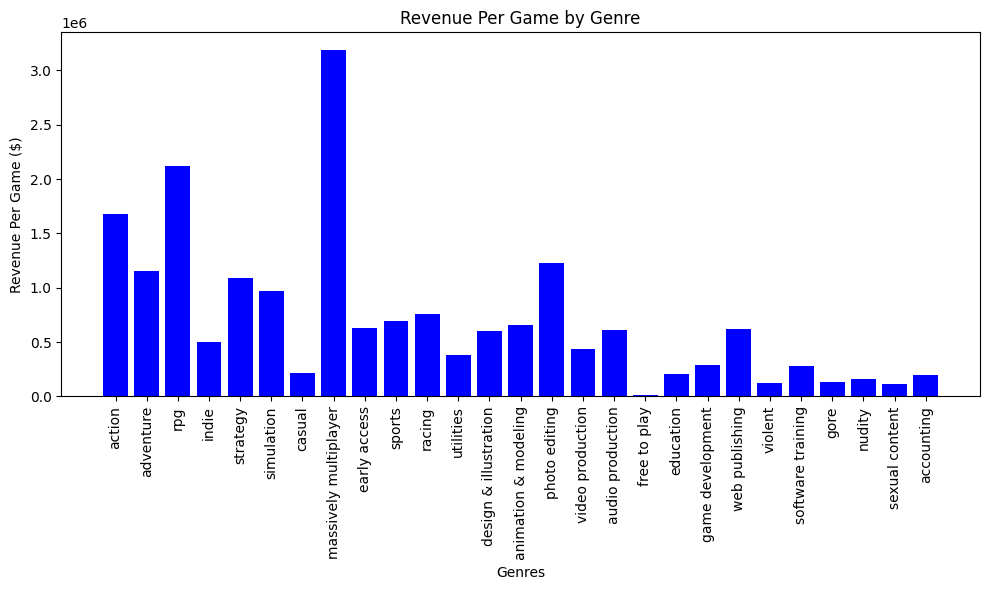

In [4]:
# Bar Chart 3: Revenue Per Game by Genre
# Calculate the revenue per game for each genre
games_genre_metrics['Revenue_Per_Game'] = games_genre_metrics['Total_Revenue'] / games_genre_metrics['Number_of_Games']

plt.figure(figsize=(10,6))
plt.bar(games_genre_metrics['Genres'], games_genre_metrics['Revenue_Per_Game'], color='blue')
plt.title('Revenue Per Game by Genre')
plt.xlabel('Genres')
plt.ylabel('Revenue Per Game ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This bar plot helps identify which genres are more profitable on a per-game basis. There is considerable variation in revenue per game across different genres, but genres such as “Massively Multiplayer” and “RPG” show exceptionally high revenue per game.

### Average Playtime vs. Number of Games by Genre

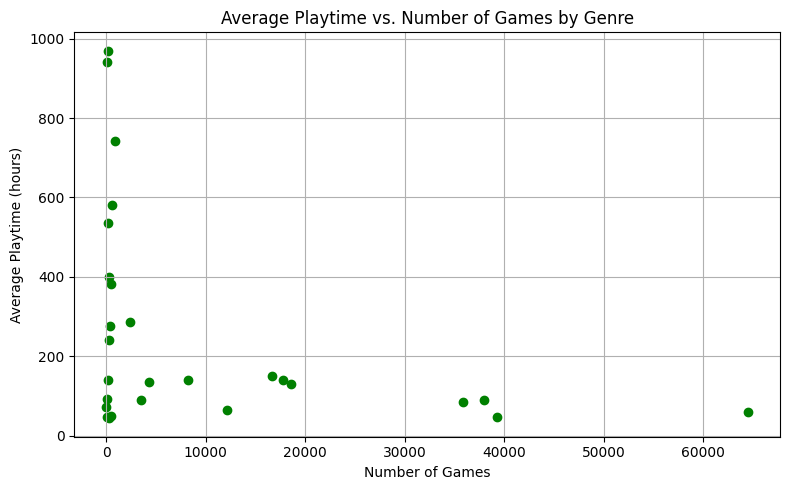

In [5]:
# Scatter Plot 1: Average Playtime vs. Number of Games by Genre
plt.figure(figsize=(8,5))
plt.scatter(games_genre_metrics['Number_of_Games'], games_genre_metrics['Average_Playtime_Forever'], color='green')
plt.title('Average Playtime vs. Number of Games by Genre')
plt.xlabel('Number of Games')
plt.ylabel('Average Playtime (hours)')
plt.grid(True)
plt.tight_layout()
plt.show()


This plot indicates a weak inverse trend where genres with more games tend to have lower average playtimes, while genres with fewer games (such as RPGs) tend to have higher average playtimes. This suggests that game types with more immersive or in-depth experiences (fewer but longer games) are more time-consuming, while genres with many shorter, less immersive titles may have more games but less player engagement per title.

### Average Positive Review Rate vs. Average Playtime by Genre

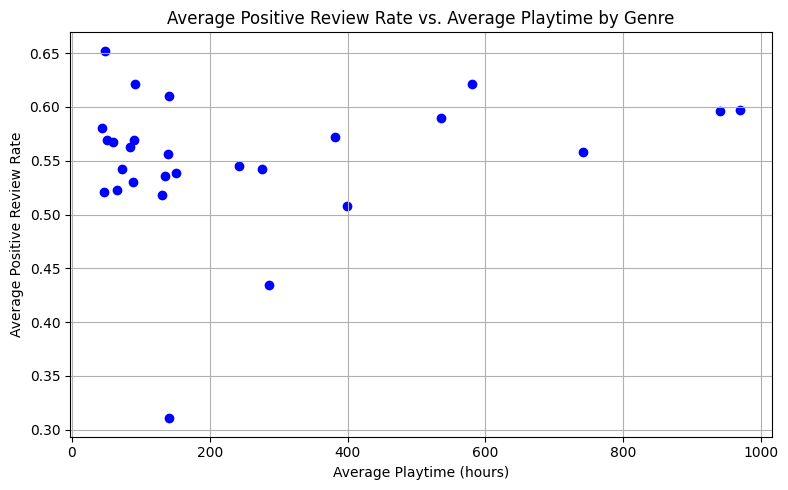

In [6]:
# Scatter Plot 2: Average Positive Review Rate vs. Average Playtime by Genre
plt.figure(figsize=(8,5))
plt.scatter(games_genre_metrics['Average_Playtime_Forever'], games_genre_metrics['Average_Positive_Review_Rate'], color='blue')
plt.title('Average Positive Review Rate vs. Average Playtime by Genre')
plt.xlabel('Average Playtime (hours)')
plt.ylabel('Average Positive Review Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

This plot suggests that longer playtime does not always equate to higher player satisfaction, and other factors (like game quality or genre preferences) may influence review rates more than just the time spent playing.

### Total Estimated Players vs Total Revenue by Genre

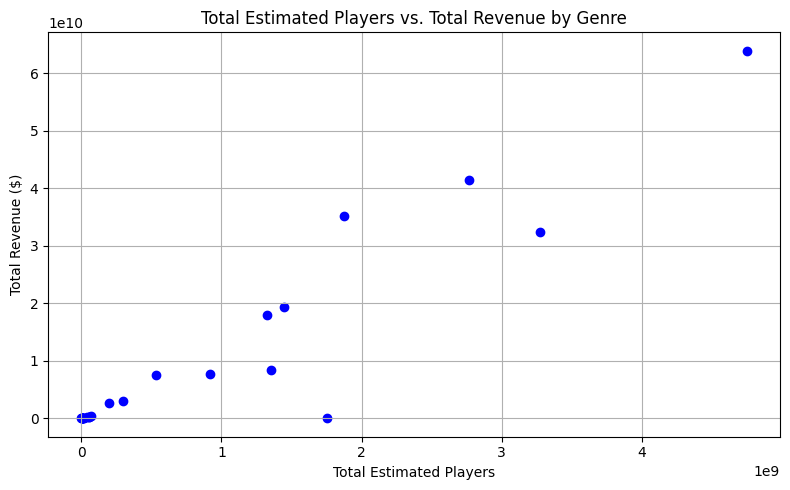

In [7]:
# Scatter Plot 3: Total Estimated Players vs Total Revenue by Genre
plt.figure(figsize=(8,5))
plt.scatter(games_genre_metrics['Total_Estimated_Players'], games_genre_metrics['Total_Revenue'], color='blue')
plt.title('Total Estimated Players vs. Total Revenue by Genre')
plt.xlabel('Total Estimated Players')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

The plot shows a strong positive correlation between the number of players and total revenue. This indicates that genres with more players tend to generate higher revenue, which is expected since a larger player base often leads to increased sales or in-game purchases.

### Grouped Revenue Share by Genre

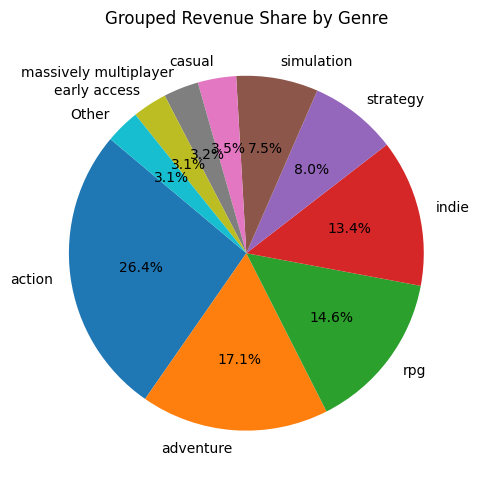

In [8]:
# Group genres that contribute less than 2% into an "Other" category for pie charts
def group_small_values(data, values_col, labels_col, threshold=0.02):
    # Create a copy of the input data to avoid modifying the original dataframe.
    data = data.copy()
    total = data[values_col].sum()

    # Calculate the percentage of each row, by adding a new column called Percentage
    data['Percentage'] = data[values_col] / total
    large_values = data[data['Percentage'] >= threshold]

    # Sum up the values from the rows that contribute less than the threshold
    small_values_sum = data[data['Percentage'] < threshold][values_col].sum()

    # Combine the large values (keep as they are), and the "Other" category
    grouped_data = pd.concat([large_values, pd.DataFrame([{labels_col: 'Other', values_col: small_values_sum}])], ignore_index=True)
    
    return grouped_data

# Group genres for each pie chart (Total Revenue, Total Estimated Players, Number of Games)
grouped_revenue = group_small_values(games_genre_metrics, 'Total_Revenue', 'Genres')
grouped_players = group_small_values(games_genre_metrics, 'Total_Estimated_Players', 'Genres')
grouped_games = group_small_values(games_genre_metrics, 'Number_of_Games', 'Genres')

# Pie Chart 1: Grouped Revenue Share by Genre
plt.figure(figsize=(5,5))
plt.pie(grouped_revenue['Total_Revenue'], labels=grouped_revenue['Genres'], autopct='%1.1f%%', startangle=140)
plt.title('Grouped Revenue Share by Genre')
plt.tight_layout()
plt.show()

This pie chart visualizes how different genres contribute to the total gaming industry revenue. Genres like "Action" and "Adventure" dominate the revenue share, highlighting their financial impact.

### Grouped Proportion of Total Estimated Players by Genre

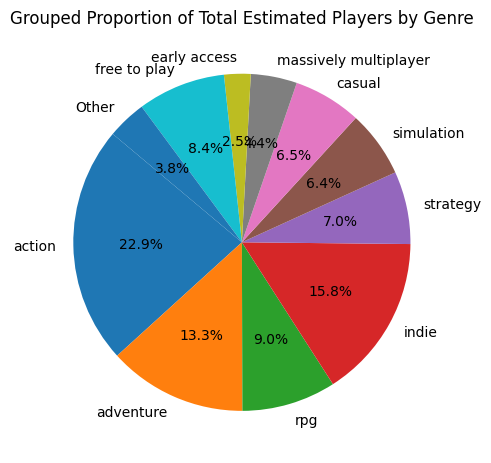

In [9]:
# Pie Chart 2: Grouped Proportion of Total Estimated Players by Genre
plt.figure(figsize=(5,5))
plt.pie(grouped_players['Total_Estimated_Players'], labels=grouped_players['Genres'], autopct='%1.1f%%', startangle=140)
plt.title('Grouped Proportion of Total Estimated Players by Genre')
plt.tight_layout()
plt.show()

This pie chart reveals that genres like "Action" and "Adventure" attract the largest player base, emphasizing their popularity among gamers.

### Grouped Number of Games Share by Genre

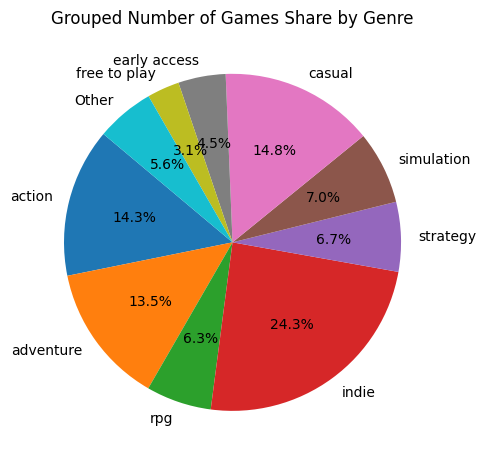

In [10]:
# Pie Chart 3: Grouped Number of Games Share by Genre
plt.figure(figsize=(5,5))
plt.pie(grouped_games['Number_of_Games'], labels=grouped_games['Genres'], autopct='%1.1f%%', startangle=140)
plt.title('Grouped Number of Games Share by Genre')
plt.tight_layout()
plt.show()

This pie chart reveals that the "Indie" genre leads in the number of games, followed by “Casual”. This highlights the large volume of games developed within these two categories.

### Heatmap of the Correlation matrix

A heatmap is useful for visualizing the relationships and correlations between different metrics like average playtime, total revenue, positive review rate, and total estimated players. 

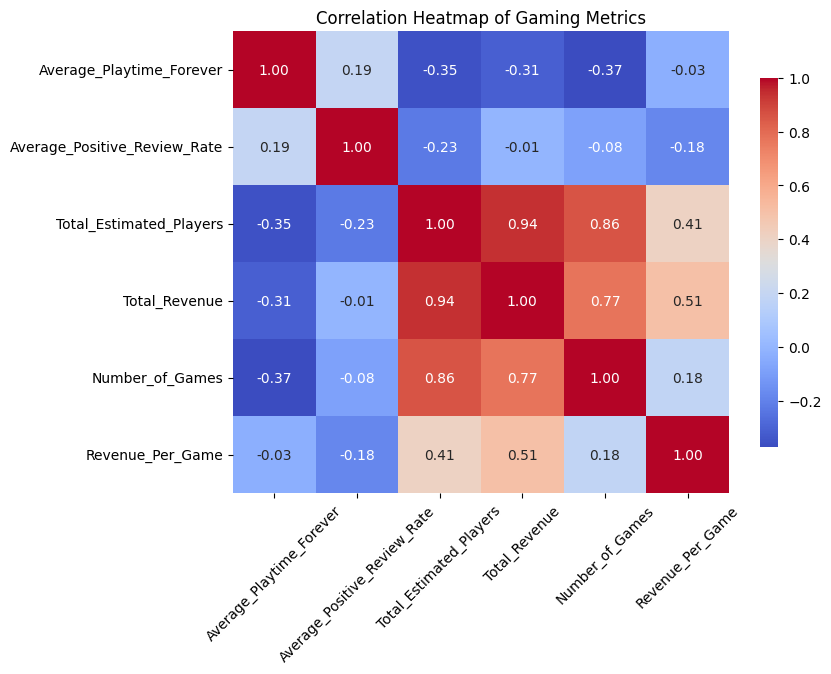

In [11]:
# Exclude non-numeric columns before calculating the correlation matrix
numeric_data = games_genre_metrics.select_dtypes(include=[np.number])  # assuming you have numpy imported as np

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap of Gaming Metrics')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.yticks(rotation=0)   # Ensure y labels are horizontal for clarity
plt.show()

### Insights gained from the correlation matrix of the games_genre_metrics dataset:

- Total Revenue and Total Estimated Players: There's a very strong positive correlation (0.94) between these two variables, indicating that genres with higher player counts generally generate more revenue.

- Total Revenue and Number of Games: There is a positive correlation (0.77), suggesting that genres with more games tend to generate more revenue.

- Average Playtime and Total Revenue/Players: Average Playtime shows negative correlations with Total Revenue (-0.31) and Total Estimated Players (-0.35), suggesting that genres where players spend more time per game do not necessarily have higher revenue or player counts.

- Average Positive Review Rate and Revenue: Surprisingly, these metrics show little to no correlation, indicating that higher player satisfaction does not necessarily translate to higher financial success.
